In [1]:
push!(LOAD_PATH, joinpath(@__DIR__, "..", "src"))

4-element Vector{String}:
 "@"
 "@v#.#"
 "@stdlib"
 "/net/fs09/d0/jpalmo/Projects/O3Fire/paper/code/boxmodel/figures/../src"

In [2]:
using RateLaws

In [3]:
using BoxModel

In [4]:
using Observations

In [5]:
using Plots
using CairoMakie
using StatsPlots
using Statistics
using LaTeXStrings
using CSV
using DataFrames
using Distributions

In [6]:
function determine_bins(data1, data2,) 
    # Step 1: Determine global min and max values across all fields
    min_val = minimum(skipmissing([minimum(data1), minimum(data2)]))
    max_val = maximum(skipmissing([maximum(data1), maximum(data2)]))

    # Step 2: Define the bin edges based on global min/max
    num_bins = 50
    bin_edges = range(min_val, stop=max_val, length=num_bins + 1)  # 50 bins means 51 edges

    return bin_edges
    end

determine_bins (generic function with 1 method)

In [7]:
function determine_bins(data1, data2, data3) 
    # Step 1: Determine global min and max values across all fields
    min_val = minimum(skipmissing([minimum(data1), minimum(data2), minimum((data3))]))
    max_val = maximum(skipmissing([maximum(data1), maximum(data2), maximum((data3))]))

    # Step 2: Define the bin edges based on global min/max
    num_bins = 50
    bin_edges = range(min_val, stop=max_val, length=num_bins + 1)  # 50 bins means 51 edges

    return bin_edges
    end

determine_bins (generic function with 2 methods)

In [8]:
### Bootstrap values from the distributions defined in the Observations module
# these represent the "at emission" scenario
# most are drawn from emission ratios reported by Gkatzelis et al. 2024,
# except for ASA, which is arbitrarily defined as a normal distribution with a mean that is 
N = 500

VOC_bootstrap = rand(dVOC, N,)
NOxCO_bootstrap = rand(dNOxCO, N,)
CH2O_bootstrap = rand(dCH2O, N,)
HNO2_bootstrap = rand(dHNO2, N,);
ASA_bootstrap = rand(dASA, N,).*4;

# Plot

## Figure 7b

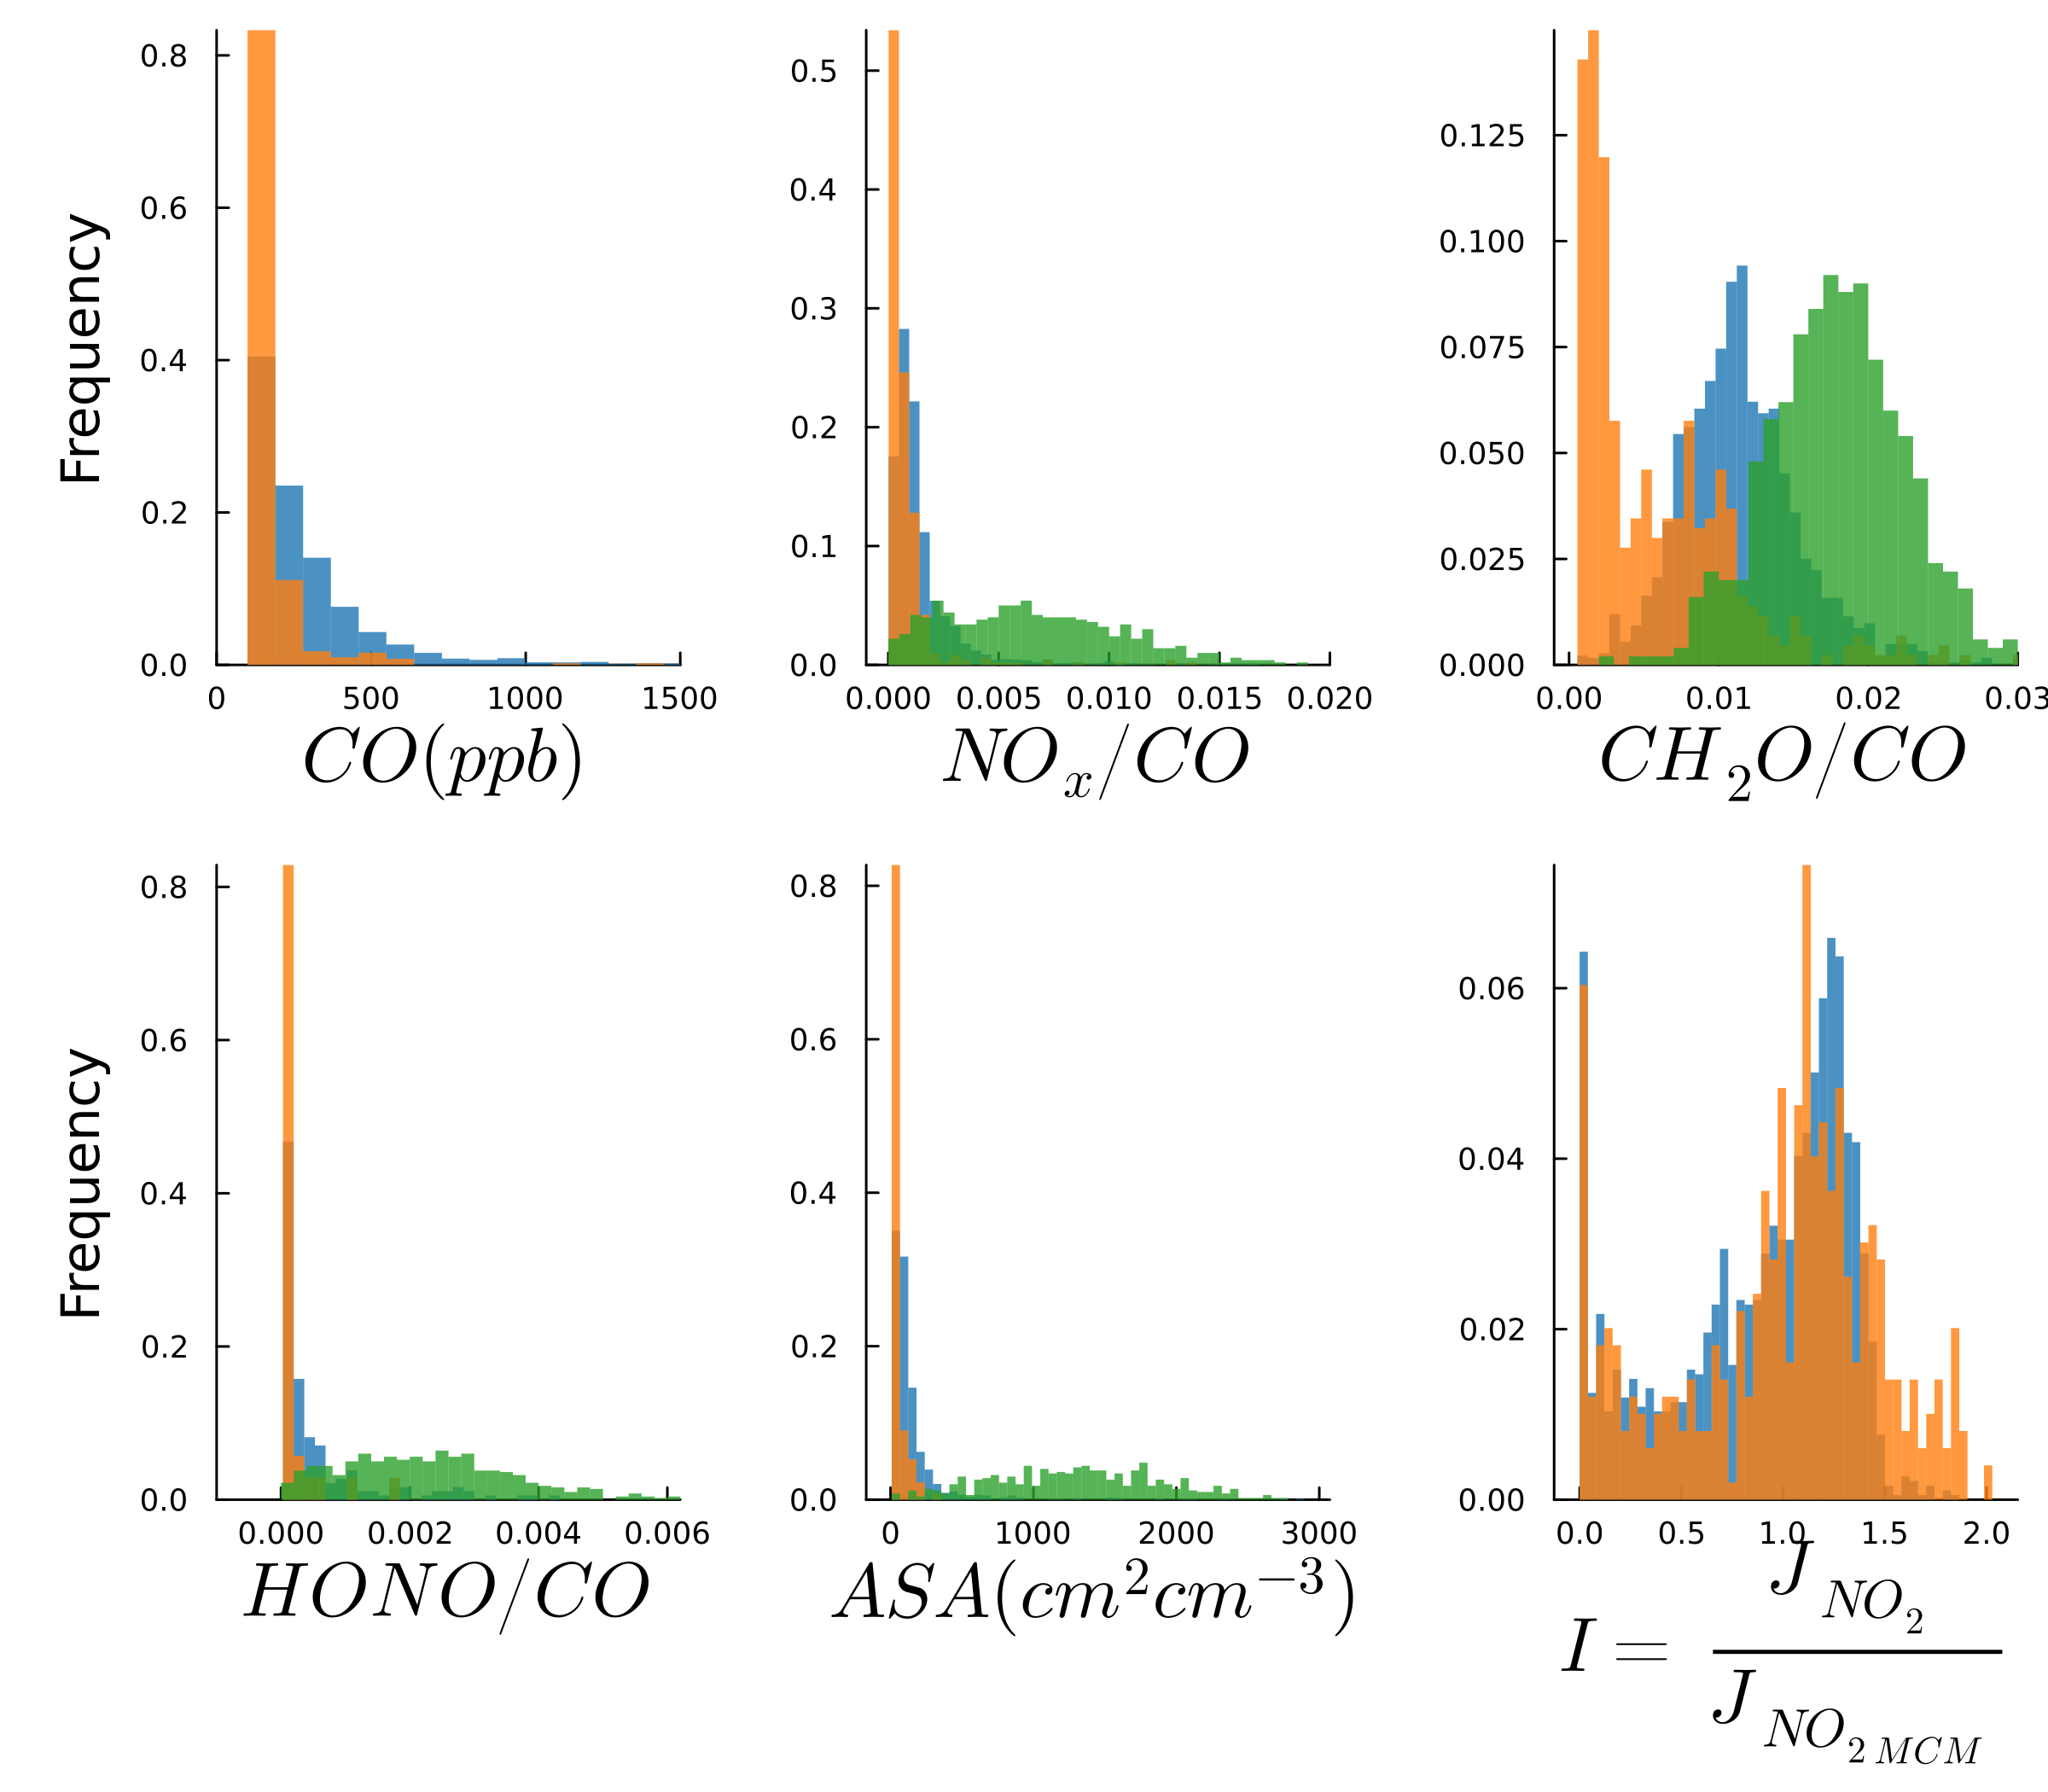

"/net/fs09/d0/jpalmo/Projects/O3Fire/paper/figures/fig_07b.png"

In [19]:
# Define the LaTeX labels for the Factor column
latex_labels = [
    L"CO (ppb)",  
    L"NO_x/CO", 
    L"VOC/CO",  
    L"CH_2O/CO",  
    L"HONO/CO",  
    L"I = \frac{J_{NO_2}}{J_{NO_2_{MCM}}}",  
    L"ASA (cm^2 cm^{−3})", 
]

# Define common plot keyword arguments in a NamedTuple
common_kwargs = (
    normalize = :probability,
    alpha = 0.8,
    palette = :tab10,
    linecolor = :match,
    linewidth = 0,
    legend = false,
    grid = false,
)

# Set the color scheme
set_theme!(colormap = :Pastel1_3)

# Create a figure with five subplots
p = Plots.plot(layout=(2, 3), size=(800, 700), dpi=300, fmt=:png)

# Plot the distributions for CO in each field using the common kwargs
bin_edges = determine_bins(near_field.CO/1e3, far_field.CO/1e3)
histogram!(p[1], near_field.CO/1e3, xlabel="CO (ppb)", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[1], far_field.CO/1e3, xlabel="CO (ppb)", ylabel="Frequency", bins=bin_edges; common_kwargs...)
Plots.xlims!(p[1], (0, 1500))
Plots.xlabel!(p[1],latex_labels[1])

# Plot the distributions for NOx in each field
bin_edges = determine_bins(near_field.NOx./near_field.CO, far_field.NOx./far_field.CO, NOxCO_bootstrap)
histogram!(p[2], near_field.NOx./near_field.CO, xlabel="NOx/CO", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[2], far_field.NOx./far_field.CO, xlabel="NOx/CO", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[2], NOxCO_bootstrap, bins=50; common_kwargs...)
Plots.xlims!(p[2], (-0.001, 0.02))
Plots.xlabel!(p[2],latex_labels[2])
Plots.ylabel!(p[2], "")

# Plot the distributions for CH2O in each field
bin_edges = determine_bins(near_field.CH2O./near_field.CO, far_field.CH2O./far_field.CO, CH2O_bootstrap)
histogram!(p[3], near_field.CH2O./near_field.CO, xlabel="CH2O (ppb)", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[3], far_field.CH2O./far_field.CO, xlabel="CH2O/CO", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[3], CH2O_bootstrap, bins=50; common_kwargs...)
Plots.xlims!(p[3], (-0.001, 0.03))
Plots.xlabel!(p[3], latex_labels[4])
Plots.ylabel!(p[3], "")

# Plot the distributions for HNO2 in each field
bin_edges = determine_bins(near_field.HNO2./near_field.CO, far_field.HNO2./far_field.CO, HNO2_bootstrap)
histogram!(p[4], near_field.HNO2./near_field.CO, xlabel="HONO (ppb)", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[4], far_field.HNO2./far_field.CO, xlabel="HONO/CO", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[4], HNO2_bootstrap, bins=50; common_kwargs...)
Plots.xlims!(p[4], (-0.001, 0.0062))
Plots.xlabel!(p[4], latex_labels[5])

# Plot the distributions for ASA in each field
bin_edges = determine_bins(near_field.ASA, far_field.ASA, ASA_bootstrap)
histogram!(p[5], near_field.ASA, xlabel="ASA", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[5], far_field.ASA, xlabel="ASA", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[5], ASA_bootstrap, xlabel="ASA", ylabel="Frequency", bins=bin_edges; common_kwargs...)
Plots.xlabel!(p[5], latex_labels[7])
Plots.ylabel!(p[5], "")

# Plot the distributions for age in each field
# histogram!(p[7], near_field.age, xlabel="Age", ylabel="Frequency", bins=50; common_kwargs...)
# histogram!(p[7], far_field.age, xlabel="Age", ylabel="Frequency", bins=50; common_kwargs...)

# Plot the distributions for jNO2 in each field
bin_edges = determine_bins(near_field.jNO2./photolysisMCM(1.165E-02, 0.244, 0.267), far_field.jNO2./photolysisMCM(1.165E-02, 0.244, 0.267))
histogram!(p[6], near_field.jNO2./photolysisMCM(1.165E-02, 0.244, 0.267), xlabel="jNO2/jNO2_MCM", ylabel="Frequency", bins=bin_edges; common_kwargs...)
histogram!(p[6], far_field.jNO2./photolysisMCM(1.165E-02, 0.244, 0.267), xlabel="jNO2/jNO2_MCM", ylabel="Frequency", bins=bin_edges; common_kwargs...)
Plots.xlabel!(p[6], latex_labels[6],)
Plots.ylabel!(p[6], "")

StatsPlots.plot!(legendfontsize=16, tickfontsize=8, guidefontsize=14, titlefontsize=16, xlabelfontsize=20, ylabelfontsize=14, left_margin = 6Plots.mm, bottom_margin = 1Plots.mm)

# Display the figure
display(p)
# Add bold "a)" in top-left corner
# text!(p[1], "a)", position = Point2f(3.5, 40),
#       align = (:left, :top), fontsize=30, font=:bold)
# save figure as PNG, high quality
# CairoMakie.save("../../../figures/fig_07a.png", f,)
# f

# Save the figure
savefig(p, "../../../figures/fig_07b.png",)
